In [ ]:
# Assignment 7 - Data Analytics I

# Create a Linear Regression Model using Python/R to predict home prices using
# Boston Housing Dataset. The Boston Housing dataset contains information about various houses in Boston through
# different parameters. There are 506 samples and 14 feature variables in this dataset.
# The objective is to predict the value of prices of the house using the given features.


# STEPS 
# 1. Importing all the required libraries
# 2. Reading the dataset
# 3. Exploring the data scatter
# 4. Data cleaning
# 5. Training our model
# 6. Exploring our results
# 7. Working with a smaller dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
data = pd.read_csv('boston_housing.csv')
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [5]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data.isnull().any()

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
b          False
lstat      False
medv       False
dtype: bool

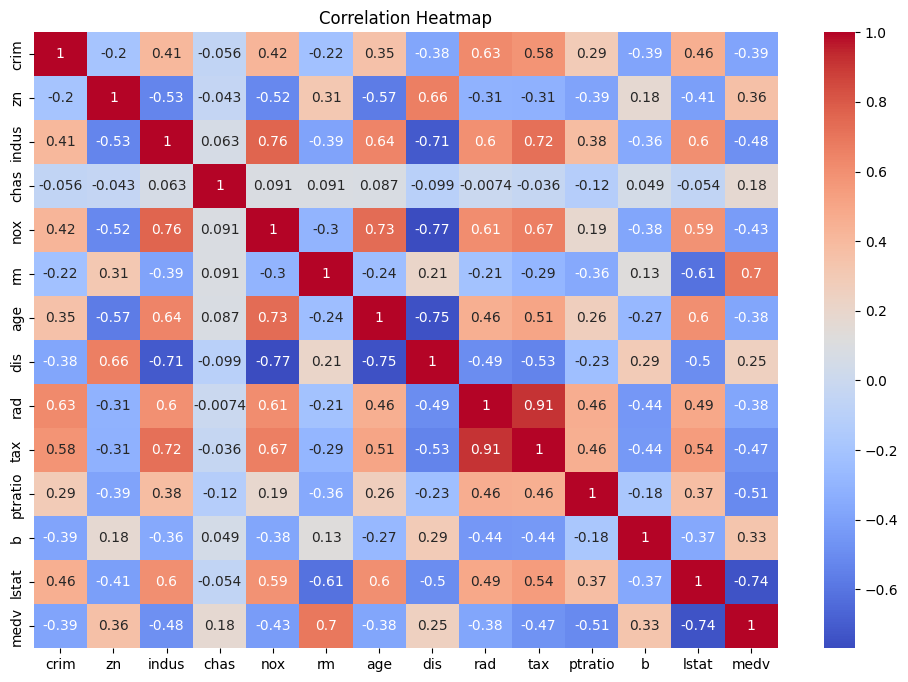

In [7]:
#Check for co-relation using heatmap

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

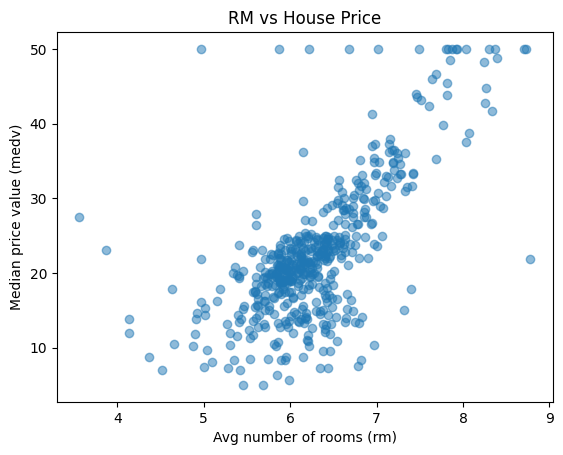

In [8]:
#Scatter plot to determine the relation betwenn Rooms and Median Price 

plt.scatter(data['rm'], data['medv'], alpha=0.5)
plt.xlabel("Avg number of rooms (rm)")
plt.ylabel("Median price value (medv)")
plt.title("RM vs House Price")
plt.show()

In [9]:
# Training the Model

# 1. Create you Independent (x)(also called features) and dependent (y)(and target) variables

x = data.drop('medv', axis=1)
y = data['medv']

# 2. Split the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 3. Initialize and train the model
model = LinearRegression() #Linear regression model object
model.fit(x_train, y_train) #Train model

LinearRegression()

In [10]:
#Exploring the Results 

#Predict the results
y_pred = model.predict(x_test)

#Evaluate the results by comparing y_pred to the y_test
#using Mean squared error method and R^2 score method

print("Mean squared error: ", mean_squared_error(y_test, y_pred))
# On average, your model’s prediction errors are about √21.52 ≈ 4.64 units off (since MSE is in squared units).
# Lower MSE = better model.

print("R^2 score: ", r2_score(y_test, y_pred))
# 71.1% of the variance in house prices is explained by your model.
# R² ranges from:
# 1.0: perfect prediction
# 0.0: model predicts no better than the mean
# < 0.0: model performs worse than just guessing the average

Mean squared error:  21.51744423117709
R^2 score:  0.7112260057484948


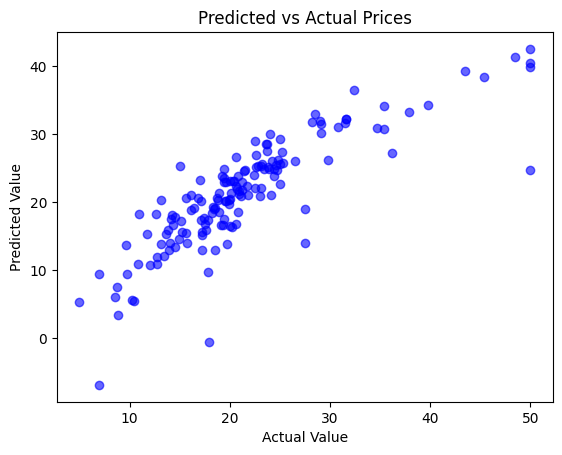

In [11]:
#Scatter plot: prediction vs actual 

plt.scatter(y_test, y_pred, color="blue", alpha=0.6)

plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Predicted vs Actual Prices")
plt.show()

In [12]:
# Working with a Smaller Dataset

x_small = data[['rm', 'lstat']]
y_small = data['medv']

x_small_train, x_small_test, y_small_train, y_small_test = train_test_split(x_small, y_small, test_size=0.3, random_state=42)

model_small = LinearRegression()
model_small.fit(x_small_train, y_small_train)

y_small_pred = model_small.predict(x_small_test)

print("Mean squared error for small dataset: ", mean_squared_error(y_small_test, y_small_pred))
print("R^2 score for small dataset: ", r2_score(y_small_test, y_small_pred))

Mean squared error for small dataset:  29.816277731842458
R^2 score for small dataset:  0.5998518447715597
